In [1]:
import pandas as pd
#%matplotlib inline
import numpy as np

In [2]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0

In [9]:
df = pd.read_csv("covid_case.csv")

In [11]:
df.head()

,ZIP Code,Week Number,Cases - Weekly,Cases - Cumulative,Case Rate - Weekly,Case Rate - Cumulative,Tests - Weekly,Tests - Cumulative,Test Rate - Weekly,Test Rate - Cumulative,Percent Tested Positive - Weekly,Percent Tested Positive - Cumulative,Deaths - Weekly,Deaths - Cumulative,Death Rate - Weekly,Death Rate - Cumulative,Population
0,60603,39.0,0.0,13.0,0.0,1107.3,25.0,327.0,2130.0,27853.5,0.0,0.0,0.0,0.0,0.0,0.0,1174.0
1,60604,39.0,0.0,31.0,0.0,3964.2,12.0,339.0,1534.0,43350.4,0.0,0.1,0.0,0.0,0.0,0.0,782.0
2,60611,16.0,8.0,72.0,25.0,222.0,101.0,450.0,312.0,1387.8,0.1,0.2,0.0,0.0,0.0,0.0,32426.0
3,60611,14.0,16.0,57.0,49.0,175.8,74.0,290.0,228.0,894.3,0.2,0.2,0.0,0.0,0.0,0.0,32426.0
4,60611,15.0,7.0,64.0,22.0,197.4,59.0,349.0,182.0,1076.3,0.1,0.2,0.0,0.0,0.0,0.0,32426.0


In [12]:
#ML | Handle Missing Data with Simple Imputer
#https://www.geeksforgeeks.org/ml-handle-missing-data-with-simple-imputer/
from sklearn.impute import SimpleImputer

In [13]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean',verbose=0)
imputer = imputer.fit(df.iloc[:, 1:])
df.iloc[:, 1:] = imputer.transform(df.iloc[:, 1:])

In [14]:
"""
ColumnTransformer
-----------------
https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html
Applies transformers to columns of an array or pandas DataFrame.
This estimator allows different columns or column subsets of the input 
to be transformed separately and the features generated by each transformer will be concatenated to form a single
feature space. This is useful for heterogeneous or columnar data, to combine several feature extraction mechanisms 
or transformations into a single transformer.

######################################################################################################################

OneHotEncoder
-------------
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
Encode categorical features as a one-hot numeric array.
"""

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
df2=columnTransformer.fit_transform(df)

In [15]:
from sklearn.preprocessing import LabelEncoder

"""
LabelEncoder
------------
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
Encode target labels with value between 0 and n_classes-1.
This transformer should be used to encode target values, i.e. y, and not the input X.
"""

labelencoder = LabelEncoder()
df["ZIP Code"]=labelencoder.fit_transform(df["ZIP Code"])
#from sklearn.preprocessing import OneHotEncoder
#onehotencoder = OneHotEncoder(categorical_features = [0])
#df = onehotencoder.fit_transform(df).toarray()

In [32]:
#K Mean Clustering
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
# https://www.geeksforgeeks.org/different-types-clustering-algorithm/

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df2)
y_kmeans=y_kmeans.reshape(1665,1)
df['cluster']=y_kmeans

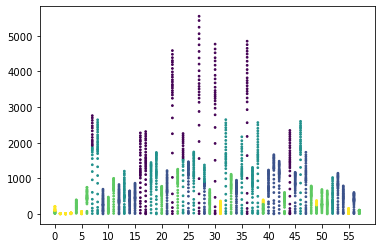

In [33]:
#df=df.to_numpy()
import matplotlib.pyplot as plt
plt.xticks(np.arange(min(df.iloc[:,0]), max(df.iloc[:,0])+1, 5.0))
plt.scatter(df.iloc[:,0],df.iloc[:,3],c=kmeans.labels_,s=3);   
plt.show()